## Importing Libraries:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import CuDNNLSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
import warnings
from keras import backend as K
warnings.filterwarnings("ignore")
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

# Loading the data

In [ ]:
train_df=pd.read_pickle('train_df.pkl')
test_df=pd.read_pickle('test_df.pkl')

# Tokenizing the word sequences

In [ ]:
MAX_WORDS = 30000
MAX_SEQUENCE_LENGTH = 350

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['comment_text'])
sequences = tokenizer.texts_to_sequences(train_df['comment_text'])

In [ ]:
# Padding the sequences since the vectors formed are of uneven size and LSTM cells need vectors of same size.
data = pad_sequences(sequences, maxlen=350)
labels = train_df['target'].values

In [ ]:
feature = train_df[['preprocessed_text']]
output = train_df[['target']]
X_train, X_cv, y_train, y_cv = train_test_split(feature, output)

# Creating the LSTM Model

In [ ]:
embedding_vecor_length = 100
model = Sequential()
model.add(Embedding(MAX_WORDS, embedding_vecor_length, input_length=350))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mse'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 350, 100)          20121100  
_________________________________________________________________
cu_dnnlstm_3 (CuDNNLSTM)     (None, 350, 128)          117760    
_________________________________________________________________
cu_dnnlstm_4 (CuDNNLSTM)     (None, 128)               132096    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 20,371,085
Trainable params: 20,371,085
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
filepath="weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
history = model.fit(X_train, y_train, nb_epoch=5,
                    batch_size=2048, validation_data=(X_cv, y_cv), verbose = 1, callbacks=callbacks_list)

Train on 1353655 samples, validate on 451219 samples
Epoch 1/5
1353655/1353655 [==============================] - 453s 334us/step - loss: 0.0204 - mean_squared_error: 0.0204 - val_loss: 0.0161 - val_mean_squared_error: 0.0161

Epoch 00001: val_loss improved from -inf to 0.01615, saving model to weights-improvement-01-0.02.hdf5
Epoch 2/5
1353655/1353655 [==============================] - 440s 325us/step - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.0162 - val_mean_squared_error: 0.0162

Epoch 00002: val_loss improved from 0.01615 to 0.01616, saving model to weights-improvement-02-0.02.hdf5
Epoch 3/5
1353655/1353655 [==============================] - 439s 325us/step - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.0158 - val_mean_squared_error: 0.0158

Epoch 00003: val_loss did not improve from 0.01616
Epoch 4/5
1353655/1353655 [==============================] - 455s 336us/step - loss: 0.0148 - mean_squared_error: 0.0148 - val_loss: 0.0157 - val_mean_squared_error: 0

Text(0.5, 1.0, 'Loss Curves')

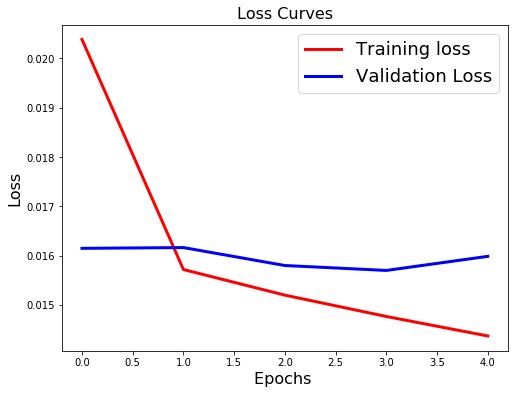

In [ ]:
 # Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Outcomes of LSTM Model:

- LSTM Model : Mean Squared Error on CV set: 0.0157
  




    